## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)

<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


b. Use the below cell to find the number of rows in the dataset.

In [4]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [5]:
len(df.user_id.unique())

290584

d. The proportion of users converted.

In [6]:
df[df.converted == 1].shape[0]/294478

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [7]:
df_treatmentonly = df.query('group == "treatment" & landing_page != "new_page"')
df_newpageonly = df.query('group != "treatment" & landing_page == "new_page"')
df_treatmentonly.shape[0] + df_newpageonly.shape[0]

3893

In [8]:
df_treatmentonly.sample(10)

,user_id,timestamp,group,landing_page,converted
221522,868651,2017-01-08 16:09:54.302457,treatment,old_page,0
249591,847957,2017-01-20 00:25:29.625537,treatment,old_page,0
264600,844575,2017-01-20 08:26:29.957383,treatment,old_page,0
8277,932318,2017-01-05 09:43:21.389878,treatment,old_page,0
24738,885649,2017-01-16 19:27:00.314146,treatment,old_page,0
200767,922926,2017-01-09 01:04:59.733097,treatment,old_page,0
83337,796640,2017-01-11 06:09:33.426015,treatment,old_page,0
101463,720460,2017-01-03 01:54:45.521337,treatment,old_page,0
81233,701225,2017-01-08 06:26:14.986641,treatment,old_page,0
55650,725781,2017-01-03 05:38:34.383044,treatment,old_page,0


f. Do any of the rows have missing values?

In [9]:
df.isna().sum().sum()

0

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
df2 = pd.concat([df,df_treatmentonly,df_newpageonly]).drop_duplicates(keep = False)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290585 non-null  int64 
 1   timestamp     290585 non-null  object
 2   group         290585 non-null  object
 3   landing_page  290585 non-null  object
 4   converted     290585 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [12]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [13]:
len(df2.user_id.unique())

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
df2.user_id.value_counts()

773192    2
630732    1
811737    1
797392    1
795345    1
         ..
650647    1
648598    1
654741    1
652692    1
630836    1
Name: user_id, Length: 290584, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [15]:
df2.loc[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
df2.drop_duplicates(subset= "user_id",inplace = True)

In [17]:
df2.loc[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [18]:
df2.converted.value_counts()[1]/290584

0.11959708724499628





b. Given that an individual was in the `control` group, what is the probability they converted?

In [19]:
df_control = df2.query('group == "control"')
p_control_converted = df_control.query('converted == 1').shape[0]/df_control.shape[0]
p_control_converted

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [20]:
df_treatment = df2.query('group == "treatment"')
p_treatment_converted = df_treatment.query('converted == 1').shape[0]/df_treatment.shape[0]
p_treatment_converted

0.11880806551510564

d. What is the probability that an individual received the new page?

In [21]:
p_newpage = df2.query('landing_page == "new_page"').shape[0]/df2.shape[0]
p_newpage

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

In [22]:
#computes the difference between the probablilties of converting in the treatment and control groups
diff = p_treatment_converted - p_control_converted
print(diff)

-0.0015782389853555567


**Answer** \
The difference between the two probabilities is so small. Thus, there is not enough evidence in favor of the new page.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Answer** \
$H_{0}: p_{new} - p_{old} =< 0$ 


$H_{1}: p_{new} - p_{old} > 0$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [23]:
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [24]:
#Under the null, the two converted rates are equal
p_old = p_new
p_old

0.11959708724499628

c. What is $n_{new}$?

In [25]:
n_new = df2.query('landing_page == "new_page"').shape[0] 
#or
#df2.query('group == "treatment"').shape[0]
n_new

145310

d. What is $n_{old}$?

In [26]:
n_old = df2.query('landing_page == "old_page"').shape[0]
#or
#df2.query('group == "control"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [27]:
new_page_converted = np.random.choice([1,0], size = n_new, p=[p_new, (1-p_new)])
new_page_converted

array([0, 0, 0, ..., 0, 1, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [28]:
old_page_converted = np.random.choice([1,0], size = n_old, p=[p_old, 1-p_old])
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [29]:
#p_new - p_old from simulation
new_page_converted.mean() - old_page_converted.mean()

-0.0013579672763518735

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [30]:
#bootstrapping
p_diffs = []
for _ in range(10000):
    boot_samp = df2.sample(df2.shape[0], replace = True)
    new_df = boot_samp.query('landing_page == "new_page"')
    old_df = boot_samp.query('landing_page == "old_page"')
    boot_pnew = new_df.query('converted == 1').shape[0]/new_df.shape[0]
    boot_pold = old_df.query('converted == 1').shape[0]/old_df.shape[0]
    p_diffs.append(boot_pnew - boot_pold)

In [31]:
p_diffs = np.array(p_diffs)
p_diffs.mean(), diff

(-0.0015707893545102197, -0.0015782389853555567)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

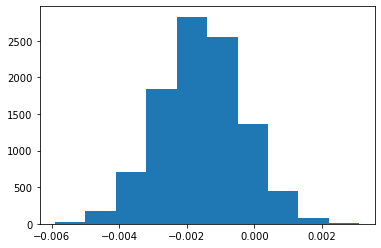

In [32]:
plt.hist(p_diffs);

In [33]:
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size )

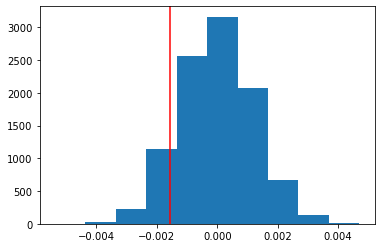

In [34]:
plt.hist(null_vals);
plt.axvline(diff, color = 'r');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [35]:
p_diffs = np.array(p_diffs)
(null_vals > diff).mean()

0.8986

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer** \
This is called the p-value. It is the probability of observing our findings given that the null hypothesis is true. The p-value we have here indicates that we fail to reject the null hypothesis. The less the p-value is, the more significant it becomes (that is we reject the null and a decision can be made to adopt the alternative hypothesis).

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [36]:
import statsmodels.api as sm

convert_old = df2.query('group == "control" & converted == 1').shape[0]
convert_new = df2.query('group == "treatment" & converted == 1').shape[0]
n_old = df2.query('group == "control"').shape[0]
n_new = df2.query('group == "treatment"').shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [37]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller', prop_var=False)

z_score, p_value

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer** \
The z-score represents how many standard deviations the observed statistic is from the mean. The p-value is 0.905 which is larger than 0.05 and we reach the same conclusion as before; we fail to reject the null hypothesis.


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer** \
Logistic Regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [38]:
df2[['new_page','old_page']]= pd.get_dummies(df2['landing_page'])
df2.drop('old_page', axis = 1, inplace = True)
df2.head()

,user_id,timestamp,group,landing_page,converted,new_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0


In [39]:
df2 = df2.rename(columns={'new_page': 'ab_page'})
df2['intercept'] = 1
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [40]:
lm_1 = sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results_1 = lm_1.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [41]:
results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 17 May 2021   Pseudo R-squ.:               8.077e-06
Time:                        22:53:19   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Answer** \
The p-value associated with ab_page is 0.190 which is still bigger than 0.05 and we still fail to reject the null. In Part II it is 0.9032. The difference can be explained by the type of test each part is performing. Part II performed a one-tailed test where the null is that the conversion rate is less or equal and the alternative is more than. While in part III, the test is two-tailed using equal and not equal signs where the null is that conversion rates for both landing pages are equal and the alternative is that they are unequal.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer** \
Adding other factors will provide more accurate results and give more insights into how several factors affect the conversion rate. However, if it happens that these factors are not independent of each other, this might give false correlations. That means adding extra factors requires careful analysis to reach a correct conclusion.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [42]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [43]:
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [44]:
df_new.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [45]:
### Creating the necessary dummy variables
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [46]:
df_new.drop('CA', axis = 1, inplace = True)
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,UK,US
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0


In [53]:
#inspecting the average conversion rate for each country for the the two landing pages
df_new.groupby(['country','ab_page']).mean()

converted  intercept  UK  US  UK_ab_page  US_ab_page
country ab_page                                                      
CA      0         0.118783        1.0   0   0           0           0
        1         0.111902        1.0   0   0           0           0
UK      0         0.120022        1.0   1   0           0           0
        1         0.121171        1.0   1   0           1           0
US      0         0.120630        1.0   0   1           0           0
        1         0.118466        1.0   0   1           0           1

In [54]:
### Fit Your Linear Model And Obtain the Results
lm_2 = sm.Logit(df_new['converted'], df_new[['intercept','US','UK']])
results_2 = lm_2.fit()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [55]:
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Tue, 18 May 2021   Pseudo R-squ.:               1.521e-05
Time:                        02:23:40   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
US             0.0408      0.027      1.518      0.129      -0.012       0.093
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
==============================================================================
"""

In [56]:
1/np.exp(0.0408), np.exp(0.0507)

(0.9600211149716509, 1.052007243765014)

Using Canada as our baseline and the above calculation, we can get that: 
* Website users located in the US are 0.96 times more likely to convert compared to those located in Canada.
* Website users located in the UK are 1.05 times more likely to convert compared to those locates in Canada.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [58]:
### Fit Your Linear Model And Obtain the Results
df_new['UK_ab_page'] = df_new['UK'] * df_new['ab_page']
df_new['US_ab_page'] = df_new['US'] * df_new['ab_page']
lm_3 = sm.Logit(df_new['converted'], df_new[['intercept','ab_page','US','UK','UK_ab_page', 'US_ab_page']])
results_3 = lm_3.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [59]:
results_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Tue, 18 May 2021   Pseudo R-squ.:               3.482e-05
Time:                        02:25:03   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
US             0.0175      0.038      0.465      0.642      -0.056       0.091
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
UK_ab_page     0.0783      0.057      1.378      0.168      -0.033       0.190
US_ab_page     0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""

Both the p-values for UK_ab_page and US_ab_page are greater than 0.05 (we fail to reject the null, that is the country is not relvant to the conversion rate) so it seems the country has almost no effect on the conversion rate. 

<a id='conclusions'></a>
## Conclusions

 In this projected, we investigated whether a website should change its landing page or not through three approaches: Probablities, A/B Testing, and Logistic Regression. 
 * From pure probablities, we reached the conclusion that further analysis was needed as not enough evidence was supporting the new page is actually doing any better than the old one.
 * From A/B testing, we came to the conclusion that we can not reject the null hypothesis as the p-value was not significant (p-value = 0.9032, but might change slightly if run again due to randomness in sampling). We used the z-score as well.
 * From the regression model, the p-value is different from the one we got in A/B testing (p-value = 0.190). But still it was not significant and we fail to reject the null. Furthermore, we explored the effect, or lack thereof, of where the website users are located might have on the conversion rate. It turned out the counrty does not have much of an influence on the conversion rate.
 
Since the experiment kept running for 4 months and the data collected is in the neighborhood of 300,000 unique user, there is no evidence the new page is any better than the old one. The final takeaway is to continue using the old page or to develop a new one and run the experiment again.
 